# SETUP
- - -

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# _Support Vector Machine_

### 예제 1
- - -

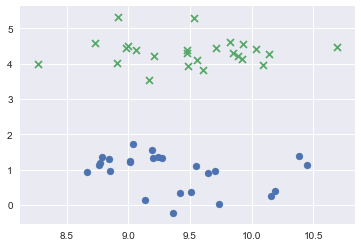

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.show()

In [105]:
X.shape, y.shape
type(X[0][0]), type(y[0])

(numpy.float64, numpy.int64)

In [106]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1e10).fit(X, y)

In [6]:
model

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# n_support_: 각 클래스의 서포트의 개수

model.n_support_

array([1, 1], dtype=int32)

In [9]:
# support_: 각 클래스의 서포트의 인덱스

model.support_

array([42,  1], dtype=int32)

In [28]:
# support_vectors_: 각 클래스의 서포트의 x 값

model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [11]:
# coef_:  w 벡터

model.coef_

array([[0.08171082, 1.10091404]])

In [12]:
# intercept_:  −w0

model.intercept_

array([-3.62995208])

In [13]:
# dual_coef_: 각 원소가  ai⋅yi로 이루어진 벡터

model.dual_coef_

array([[-0.60934379,  0.60934379]])

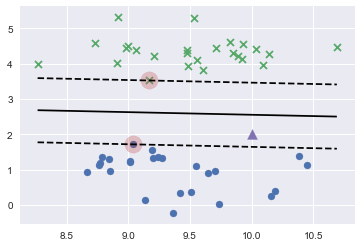

In [14]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o')
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)

plt.show()

In [15]:
x_new = [10, 2]

model.decision_function([x_new])

array([-0.61101582])

In [22]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [32]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
model.intercept_

array([-0.61101582])

### 연습 문제 1
- - -

- 붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 
- 위의 예제와 마찬가지로 커널 인수 kernel과 슬랙 변수 가중치 인수 C는 각각 linear, 1e10으로 한다.
- 특징 변수를 꽃받침의 길이와 폭만 사용한다.
- 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.

In [92]:
from sklearn.datasets import load_iris
iris = load_iris()

In [117]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.iloc[:100, :2]
df.tail()

,sepal length (cm),sepal width (cm)
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5
99,5.7,2.8


In [119]:
sy = pd.Series(iris.target)
sy = sy[:100]
sy.tail()

95    1
96    1
97    1
98    1
99    1
dtype: int64

----------

In [122]:
X1 = iris.data[:100, (0, 1)]
X1[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [123]:
y1 = iris.target
y1 = y1[:100]
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [124]:
type(y1[0])

numpy.int64

In [125]:
model1 = SVC(kernel='linear', C=1e10).fit(X1, y1)
model1

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
y1_true = y1.copy()
y1_pred = model1.predict(X1)

y1_true, y1_pred

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [127]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y1_true, y1_pred)

array([[50,  0],
       [ 0, 50]])

In [129]:
print(classification_report(y1_pred, y1_true))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100



### 연습 문제 2
- - -

- 붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 
- 위의 예제와 마찬가지로 커널 인수 kernel는 각각 linear로 한다. 
- 슬랙 변수 가중치 인수 C를 여러가지 값으로 바꾸어 보면서 서포트가 어떻게 바뀌는지 살펴본다.
- 특징 변수를 꽃잎의 길이와 폭만 사용한다.
- 붓꽃 종을 Virginica와 Versicolour만 대상으로 한다.

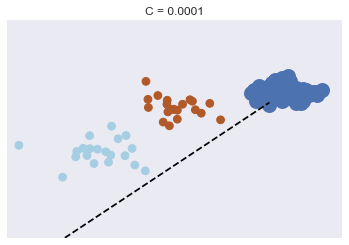

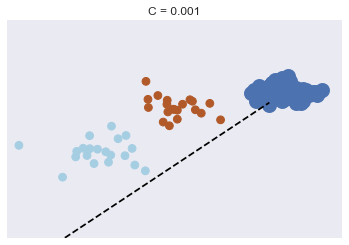

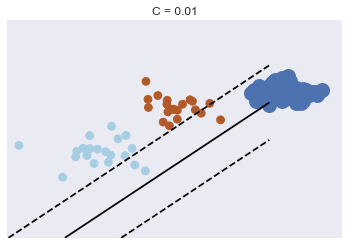

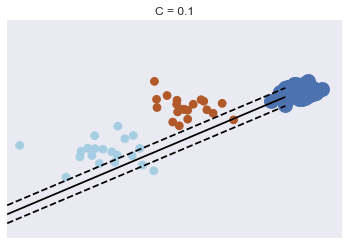

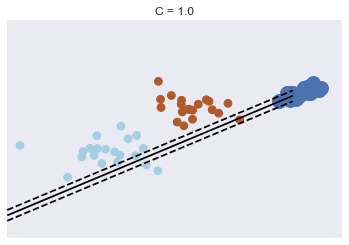

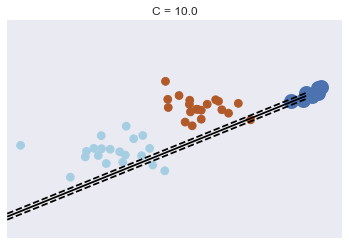

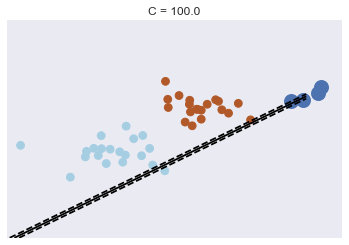

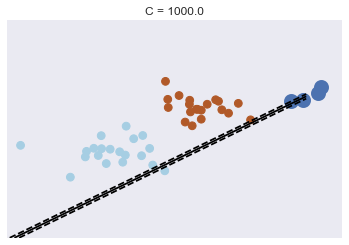

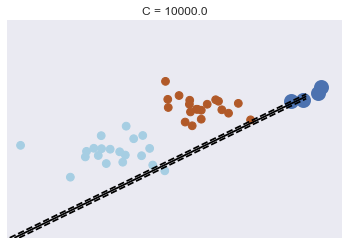

In [145]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

for penalty in np.logspace(-4, 4, 9):
    clf = SVC(kernel='linear', C=penalty).fit(X1, y1)
    xx = np.linspace(-5, 5)
    
    x_jin = -5; x_jax = 5
    y_jin = -9; y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)

    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title("C = {}".format(penalty))
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    plt.show()
    
    fignum += 1

### 연습 문제 3
- - -

- MNIST Digit Image 분류 문제를 서포트 벡터 머신으로 풀어보자.

In [147]:
from sklearn.datasets import load_digits

digits = load_digits()

In [149]:
X2 = digits.data
y2 = digits.target

In [150]:
X2.shape, y2.shape

((1797, 64), (1797,))

In [151]:
model3 = SVC(kernel='linear', C=1e10).fit(X2, y2)
model3

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
y2_true = y2.copy()
y2_pred = model3.predict(X2)

In [152]:
from sklearn.metrics import accuracy_score

In [156]:
def result_SVC(X, y, n=4):
    for C in np.logspace(-n, n, 2*n+1):
        model = SVC(kernel='linear', C=C).fit(X, y)
        y_true = y.copy()
        y_pred = model.predict(X)
        score = accuracy_score(y_true, y_pred)
        print("C = {} | accuracy_score = {}".format(C, score))

In [158]:
result_SVC(X2, y2, 10)

C = 1e-10 | accuracy_score = 0.1018363939899833
C = 1e-09 | accuracy_score = 0.1018363939899833
C = 1e-08 | accuracy_score = 0.1018363939899833
C = 1e-07 | accuracy_score = 0.1018363939899833
C = 1e-06 | accuracy_score = 0.1018363939899833
C = 1e-05 | accuracy_score = 0.8519755147468002
C = 0.0001 | accuracy_score = 0.9705063995548135
C = 0.001 | accuracy_score = 0.9910962715637173
C = 0.01 | accuracy_score = 0.9994435169727324
C = 0.1 | accuracy_score = 1.0
C = 1.0 | accuracy_score = 1.0
C = 10.0 | accuracy_score = 1.0
C = 100.0 | accuracy_score = 1.0
C = 1000.0 | accuracy_score = 1.0
C = 10000.0 | accuracy_score = 1.0
C = 100000.0 | accuracy_score = 1.0
C = 1000000.0 | accuracy_score = 1.0
C = 10000000.0 | accuracy_score = 1.0
C = 100000000.0 | accuracy_score = 1.0
C = 1000000000.0 | accuracy_score = 1.0
C = 10000000000.0 | accuracy_score = 1.0


# _Kernel Support Vector Machine_

In [159]:
# plot_xor 함수 선언

def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='b', marker='o', label='+1', s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', marker='s', label='-1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()

In [163]:
# xor 변수 선언

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

### SVC
- - -

In [164]:
from sklearn.svm import SVC

svc = SVC(kernel='linear').fit(X_xor, y_xor)

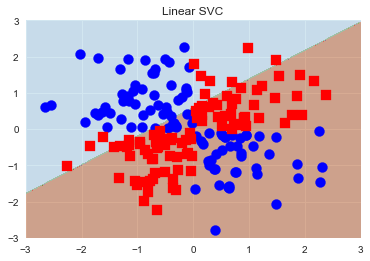

In [165]:
plot_xor(X_xor, y_xor, svc, "Linear SVC")

### 비선현 판별 모형
- - - 

In [166]:
from sklearn.preprocessing import FunctionTransformer

In [167]:
def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

X = np.arange(8).reshape(4, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [169]:
FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ],
       [36.        , 59.39696962, 49.        ]])

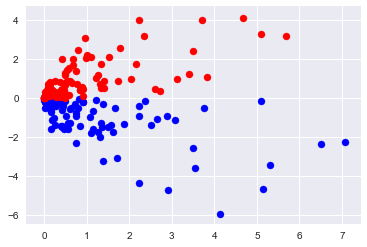

In [170]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor== 1, 0], X_xor2[y_xor== 1, 1], c="b", s=50)
plt.scatter(X_xor2[y_xor==-1, 0], X_xor2[y_xor==-1, 1], c="r", s=50)
plt.show()

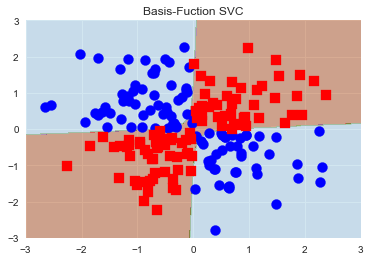

In [172]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([("basis", FunctionTransformer(basis)), ("svc", SVC(kernel='linear'))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "Basis-Fuction SVC")

### 커널 트릭

In [174]:
# 다항 커널

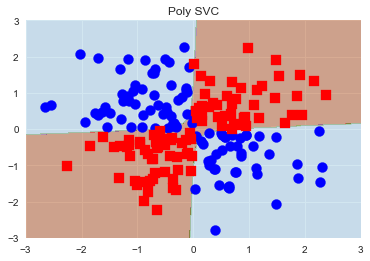

In [173]:
polysvc = SVC(kernel='poly', degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, polysvc, "Poly SVC")

In [175]:
# 시그모이드 커널

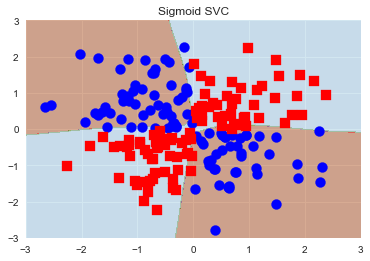

In [176]:
sigmoidsvc = SVC(kernel='sigmoid', gamma=2, coef0=2).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, sigmoidsvc, "Sigmoid SVC")

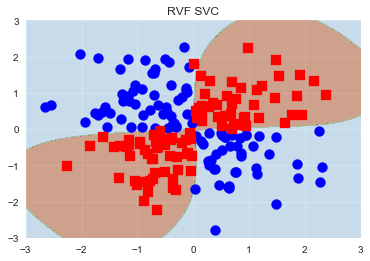

In [177]:
# RBF

rvfsvc = SVC(kernel='rbf').fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, rvfsvc, "RVF SVC")

### RVF kernel Parameter 튜닝

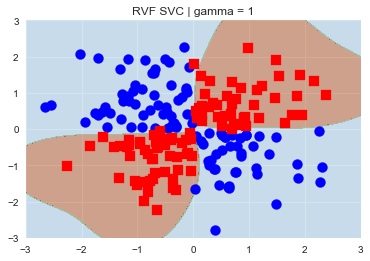

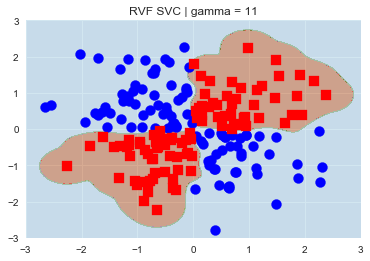

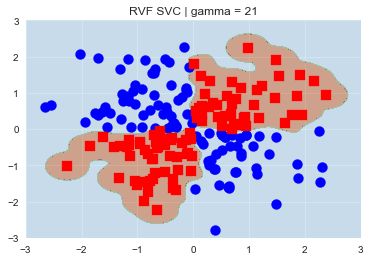

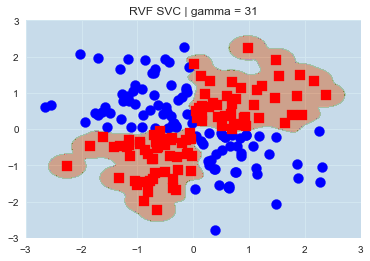

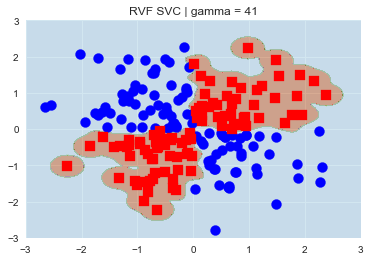

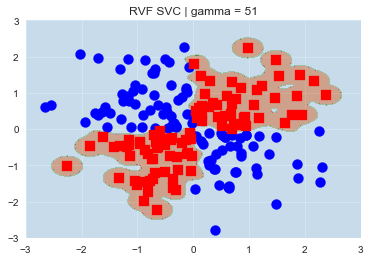

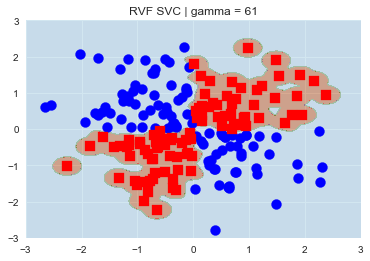

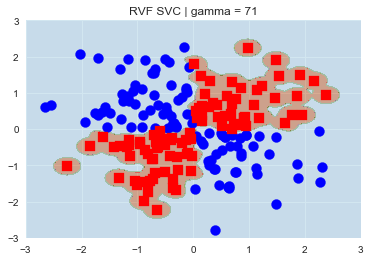

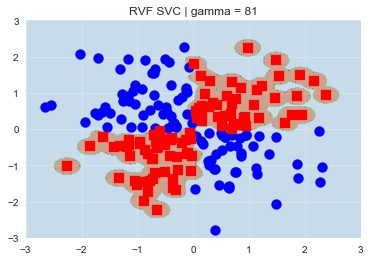

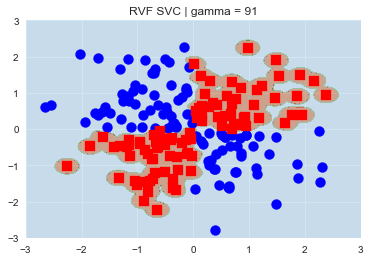

In [178]:
for i in range(1, 101, 10):
    plot_xor(X_xor, y_xor, SVC(kernel='rbf', gamma=i).fit(X_xor, y_xor), "RVF SVC | gamma = {}".format(i))